 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [78]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [79]:
whale_df = pd.read_csv("whale_returns.csv", parse_dates= True, infer_datetime_format=True, index_col="Date")


In [80]:
# Reading whale returns
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [81]:
# Count nulls
whale_df.isna().count()

SOROS FUND MANAGEMENT LLC      1060
PAULSON & CO.INC.              1060
TIGER GLOBAL MANAGEMENT LLC    1060
BERKSHIRE HATHAWAY INC         1060
dtype: int64

In [82]:
# Drop nulls
whale_df = whale_df.dropna()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [83]:
# Reading algorithmic returns
algo_df = pd.read_csv("algo_returns.csv" , parse_dates= True, infer_datetime_format=True,index_col="Date")


In [84]:
# Count nulls
algo_df.isna().count()

Algo 1    1241
Algo 2    1241
dtype: int64

In [85]:
# Drop nulls
algo_df = algo_df.dropna()
algo_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [86]:
# Reading S&P TSX 60 Closing Prices
sp_tsx = pd.read_csv("sp_tsx_history.csv" , parse_dates= True, infer_datetime_format=True,index_col="Date")


In [87]:
# Check Data Types
sp_tsx.index

DatetimeIndex(['2012-10-01', '2012-10-02', '2012-10-03', '2012-10-04',
               '2012-10-05', '2012-10-09', '2012-10-10', '2012-10-11',
               '2012-10-12', '2012-10-15',
               ...
               '2019-12-13', '2019-12-16', '2019-12-17', '2019-12-18',
               '2019-12-19', '2019-12-20', '2019-12-23', '2019-12-24',
               '2019-12-27', '2019-12-30'],
              dtype='datetime64[ns]', name='Date', length=1818, freq=None)

In [88]:
# Fix Data Types
sp_tsx["Close"] = sp_tsx["Close"].apply(lambda x: x.strip('$'))
sp_tsx["Close"] = sp_tsx["Close"].apply(lambda x: x.replace(',','')).astype(float)
sp_tsx["Close"]  


Date
2012-10-01    12370.19
2012-10-02    12391.23
2012-10-03    12359.47
2012-10-04    12447.68
2012-10-05    12418.99
                ...   
2019-12-20    17118.44
2019-12-23    17128.71
2019-12-24    17180.15
2019-12-27    17168.21
2019-12-30    17098.56
Name: Close, Length: 1818, dtype: float64

In [89]:
# Calculate Daily Returns
sp_tsx = sp_tsx.pct_change()

In [90]:
# Drop nulls
sp_tsx = sp_tsx.dropna()

In [91]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx.columns = ["sp_tsx"]
sp_tsx

,sp_tsx
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [92]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
df = pd.concat([whale_df,algo_df,sp_tsx], axis = 1)
df = df.dropna()
df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_tsx
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

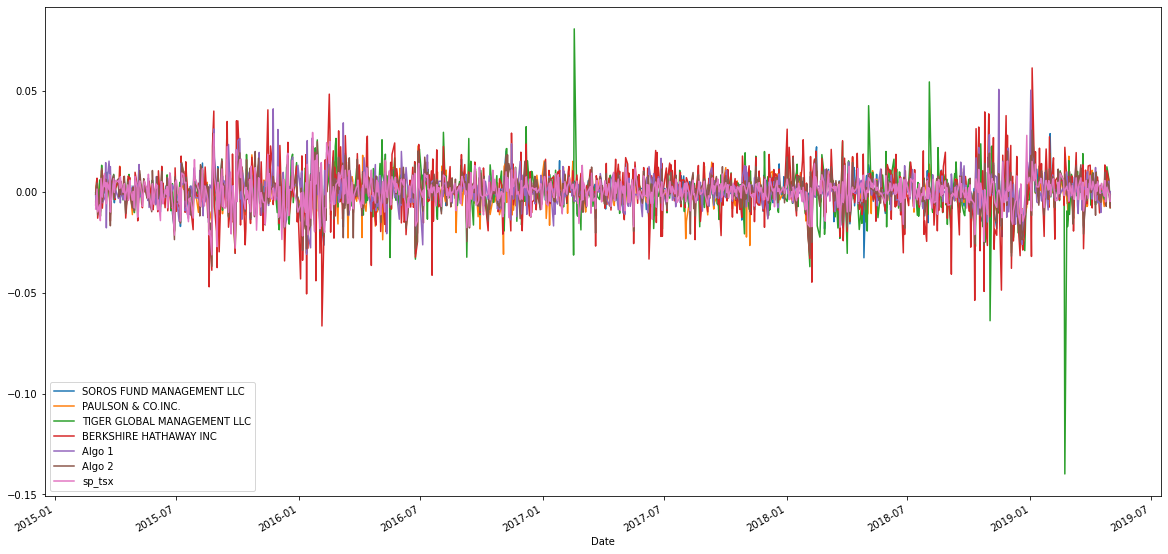

In [93]:
# Plot daily returns of all portfolios
ax = df.plot(figsize = [20,10])

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

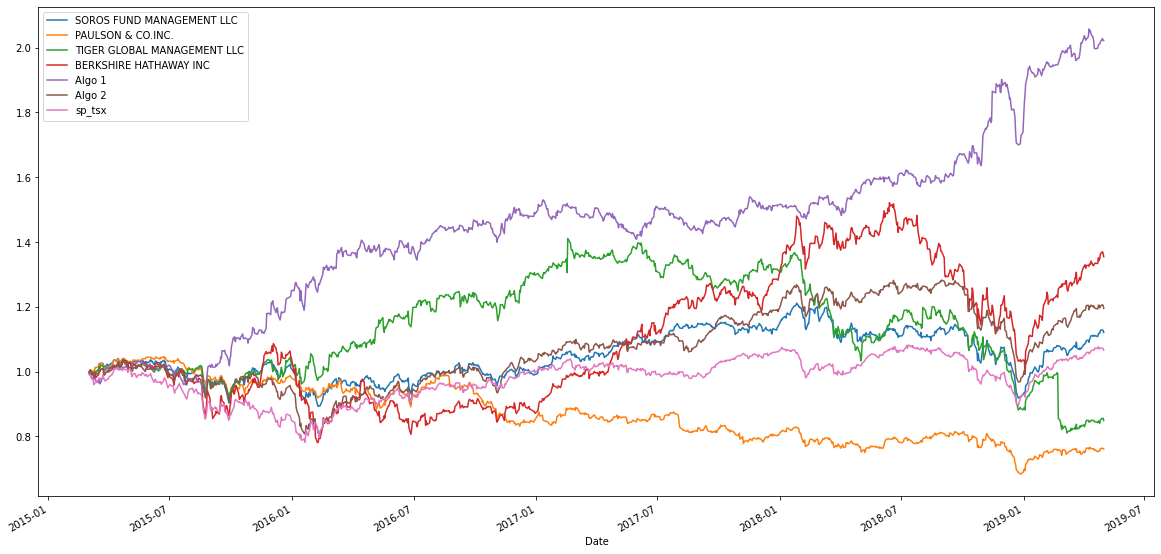

In [94]:
# Calculate cumulative returns of all portfolios
cumsum_df = (1+df).cumprod()
# Plot cumulative returns
cumsum_df.plot(figsize = [20,10])

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


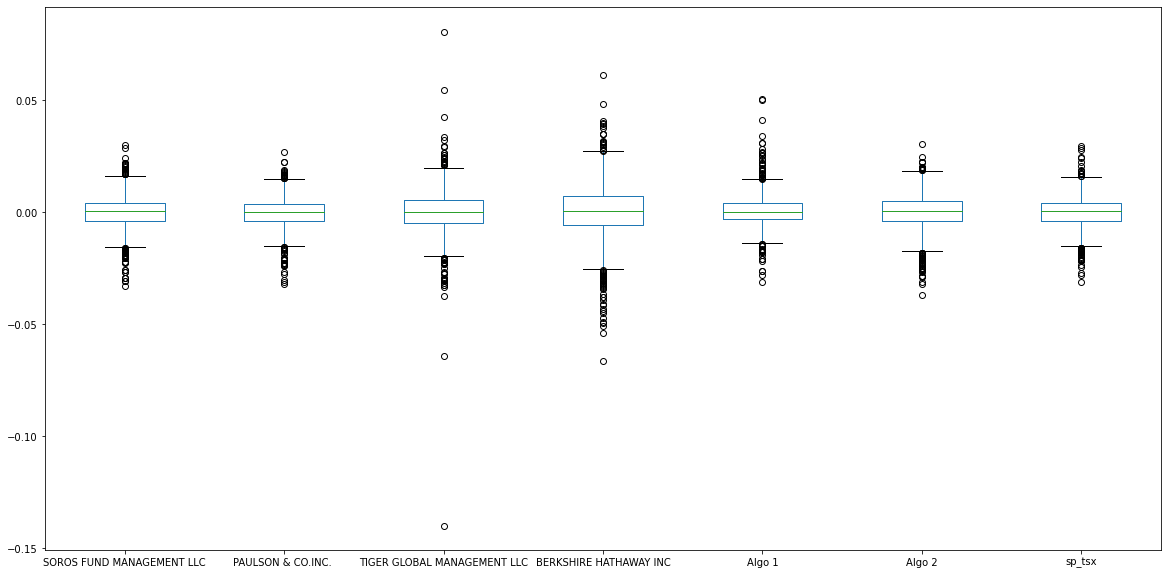

In [30]:
# Box plot to visually show risk
ax = df.plot(kind='box', figsize=[20,10])

### Calculate Standard Deviations

In [34]:
# Calculate the daily standard deviations of all portfolios
df.std()

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
sp_tsx                         0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [38]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_std = df["sp_tsx"].std()
# Determine which portfolios are riskier than the S&P TSX 60
df.std()[df.std()>sp_std]

SOROS FUND MANAGEMENT LLC      0.007828
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
dtype: float64

### Calculate the Annualized Standard Deviation

In [75]:
# Calculate the annualized standard deviation (252 trading days)
df.std()*np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
sp_tsx                         0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

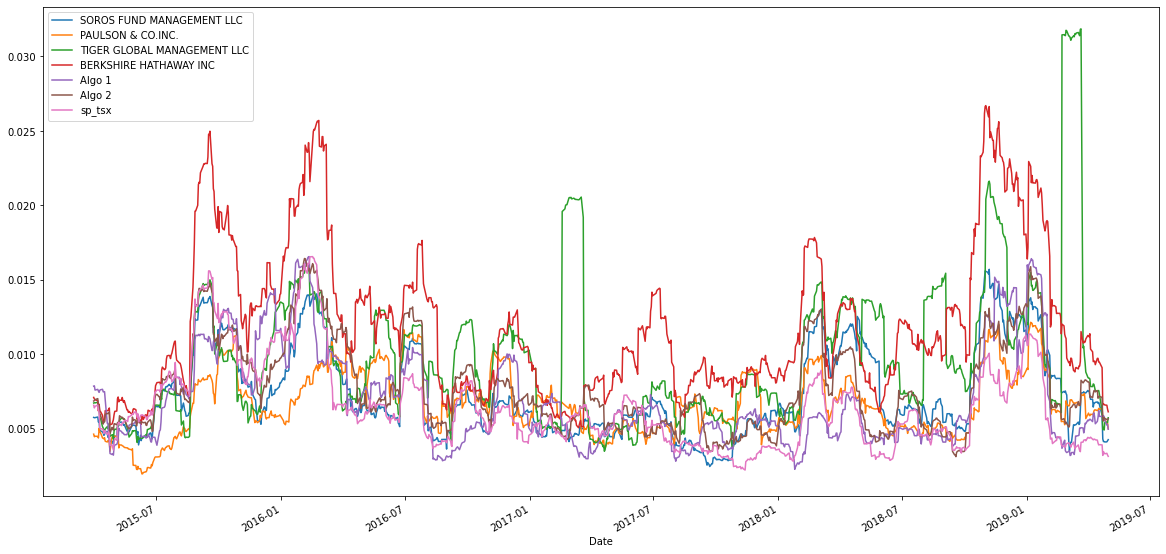

In [42]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = df.rolling(21).std()
# Plot the rolling standard deviation
rolling_std.plot(figsize = [20,10])

### Calculate and plot the correlation

<AxesSubplot:>

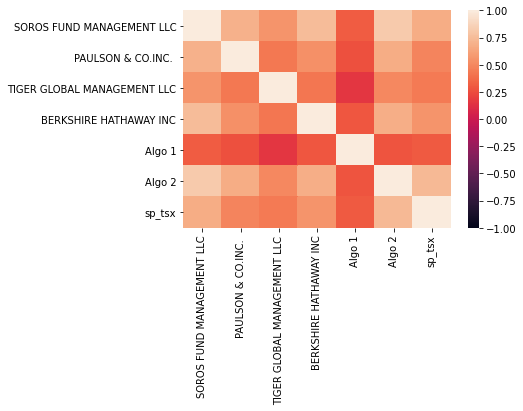

In [48]:
import seaborn as sns
# Calculate the correlation
corr_mat = df.corr()
# Display de correlation matrix
sns.heatmap(corr_mat, vmin = -1, vmax = 1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:xlabel='Date'>

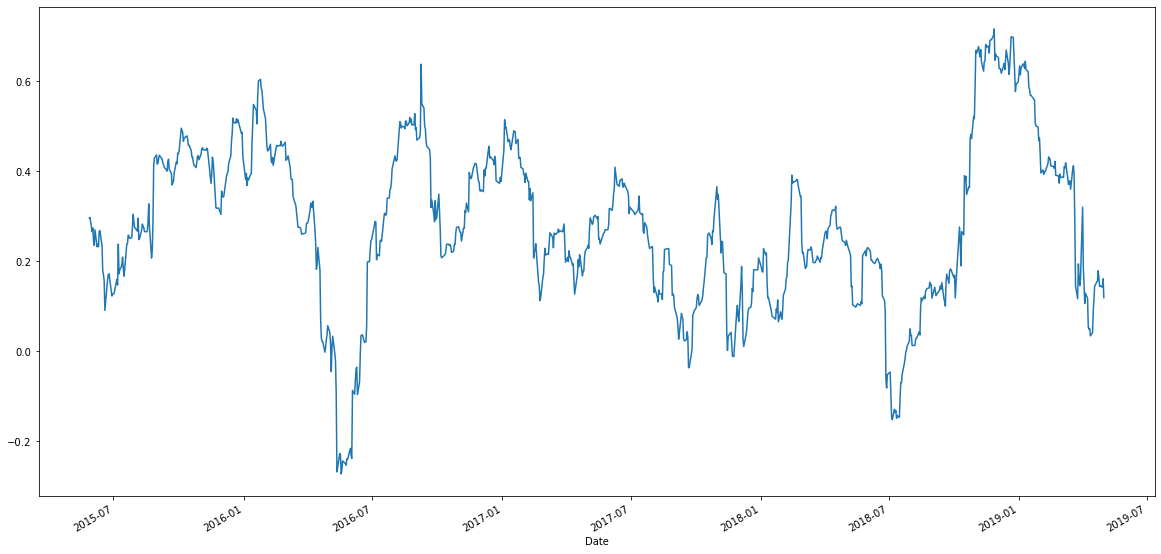

In [155]:
# Calculate covariance of a single portfolio
algo_1_cov = df["Algo 1"].cov(df["sp_tsx"])

# Calculate variance of S&P TSX
sp_var = df["sp_tsx"].var()
# Computing beta
algo_1_beta = algo_1_cov/sp_var

# Plot beta trend
rolling_cov = df["Algo 1"].rolling(window=60).cov(df["sp_tsx"])/df["sp_tsx"].rolling(window=60).var()
rolling_cov.plot(figsize=(20, 10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

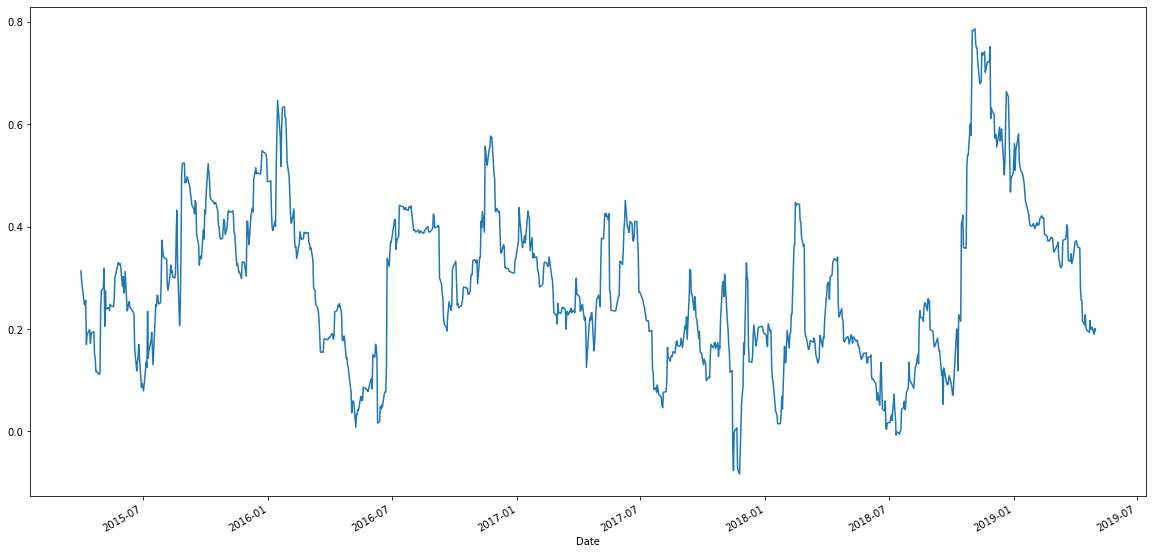

In [73]:
# Use `ewm` to calculate the rolling window
rolling_cov = df["Algo 1"].ewm(halflife=21).cov(df["sp_tsx"])/df["sp_tsx"].ewm(halflife=21).var()
rolling_cov.iloc[21:].plot(figsize=(20, 10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [76]:
# Annualized Sharpe Ratios
df_sharpe = df.mean()*252/(df.std()*np.sqrt(252))
df_sharpe

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
sp_tsx                         0.195550
dtype: float64

<AxesSubplot:>

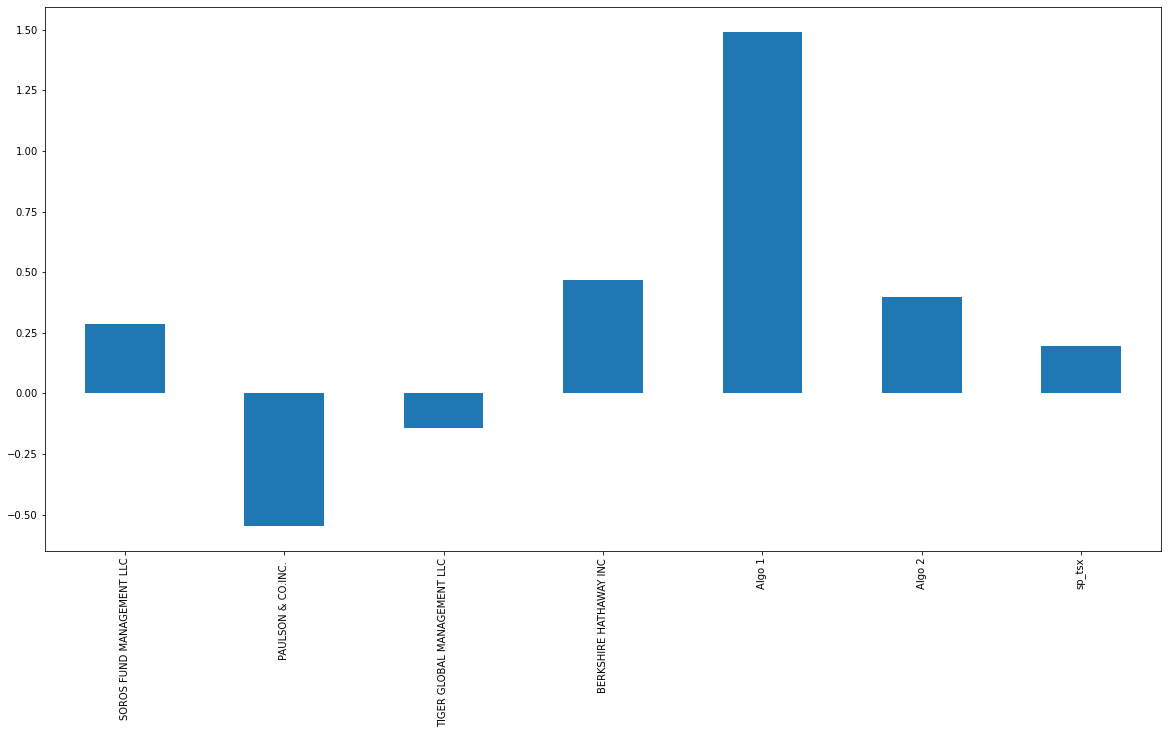

In [77]:
# Visualize the sharpe ratios as a bar plot
df_sharpe.plot(figsize = [20,10], kind='bar')

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Both algo 1 and 2 generally out perform the market portfolio and the majority of the whale portfolios on risk adjusted basis.
With Berkshire Hathaway outperforming Algo 2

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [232]:
# Reading data from 1st stock
tsla = pd.read_csv("tsla.csv", infer_datetime_format= True, date_parser=True)
tsla = tsla.set_index("Date")

tsla.index = pd.to_datetime(tsla.index).date

In [233]:
# Reading data from 2nd stock
goog = pd.read_csv("goog.csv",infer_datetime_format= True, date_parser=True)
goog = goog.set_index("Date")
goog.index = pd.to_datetime(goog.index).date
goog.index


Index([2018-02-26, 2018-02-27, 2018-02-28, 2018-01-03, 2018-02-03, 2018-05-03,
       2018-06-03, 2018-07-03, 2018-08-03, 2018-09-03,
       ...
       2020-09-11, 2020-10-11, 2020-11-11, 2020-12-11, 2020-11-13, 2020-11-16,
       2020-11-17, 2020-11-18, 2020-11-19, 2020-11-20],
      dtype='object', length=692)

In [234]:
# Reading data from 3rd stock
msft = pd.read_csv("msft.csv",infer_datetime_format= True, date_parser=True)
msft = msft.set_index("Date")
msft.index = pd.to_datetime(msft.index).date

In [235]:
# Combine all stocks in a single DataFrame
df_2 = pd.concat([tsla, goog, msft], axis =1)
df_2

,Close,Close,Close
2018-02-26,71.48,1143.75,95.42
2018-02-27,70.20,1118.29,94.20
2018-02-28,68.61,1104.73,93.77
2018-01-03,66.19,1069.52,92.85
2018-02-03,67.02,1078.92,93.05
...,...,...,...
2020-11-16,408.09,1781.38,217.23
2020-11-17,441.61,1770.15,214.46
2020-11-18,486.64,1746.78,211.08
2020-11-19,499.27,1763.92,212.42


In [236]:
# Reset Date index
df_2.index = pd.to_datetime(df_2.index)
df_2

,Close,Close,Close
2018-02-26,71.48,1143.75,95.42
2018-02-27,70.20,1118.29,94.20
2018-02-28,68.61,1104.73,93.77
2018-01-03,66.19,1069.52,92.85
2018-02-03,67.02,1078.92,93.05
...,...,...,...
2020-11-16,408.09,1781.38,217.23
2020-11-17,441.61,1770.15,214.46
2020-11-18,486.64,1746.78,211.08
2020-11-19,499.27,1763.92,212.42


In [237]:
# Reorganize portfolio data by having a column per symbol


In [238]:
# Calculate daily returns
df_2 = df_2.pct_change()
# Drop NAs
df_2 = df_2.dropna()
# Display sample data
df_2

,Close,Close,Close
2018-02-27,-0.017907,-0.022260,-0.012786
2018-02-28,-0.022650,-0.012126,-0.004565
2018-01-03,-0.035272,-0.031872,-0.009811
2018-02-03,0.012540,0.008789,0.002154
2018-05-03,-0.005222,0.011132,0.006341
...,...,...,...
2020-11-16,-0.001004,0.002454,0.003325
2020-11-17,0.082139,-0.006304,-0.012751
2020-11-18,0.101968,-0.013202,-0.015761
2020-11-19,0.025953,0.009812,0.006348


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [239]:
# Set weights
weights = [1/4, 1/4, 1/2]

# Calculate portfolio return
portfolio_returns = df_2.dot(weights)
# Display sample data
portfolio_returns.head()


2018-02-27   -0.016435
2018-02-28   -0.010976
2018-01-03   -0.021692
2018-02-03    0.006409
2018-05-03    0.004648
dtype: float64

In [240]:
df.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_tsx
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702,-0.002944,-0.001570,-0.001183
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833,0.000094,-0.007358,-0.004703


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [241]:
# Join your returns DataFrame to the original returns DataFrame

df.index = pd.to_datetime(df.index).date
df_new = pd.concat([df, portfolio_returns], axis = 1)
#df_new["2018"]
df_new.columns = [  'SOROS FUND MANAGEMENT LLC',          'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC',      'BERKSHIRE HATHAWAY INC',
                            'Algo 1',                      'Algo 2',
                            'sp_tsx',                             "Port"]
df_new

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_tsx,Port
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,NaN
...,...,...,...,...,...,...,...,...
2020-12-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.016814
2020-12-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.004040
2020-12-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.051530
2020-12-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026630


In [242]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
df_new = df_new.dropna()
df_new.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_tsx,Port
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,-0.021692
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,0.017926
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,0.003771
2018-01-10,-0.002753,-0.002290,-0.005720,-0.004781,0.003567,-0.000224,-0.004368,0.049196
2018-01-11,0.010541,0.011773,-0.002063,0.017662,-0.005614,0.016898,0.002400,-0.000550


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [243]:
# Calculate the annualized `std`
df_new.std()*np.sqrt(252)
df_new.columns

Index(['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'sp_tsx', 'Port'],
      dtype='object')

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

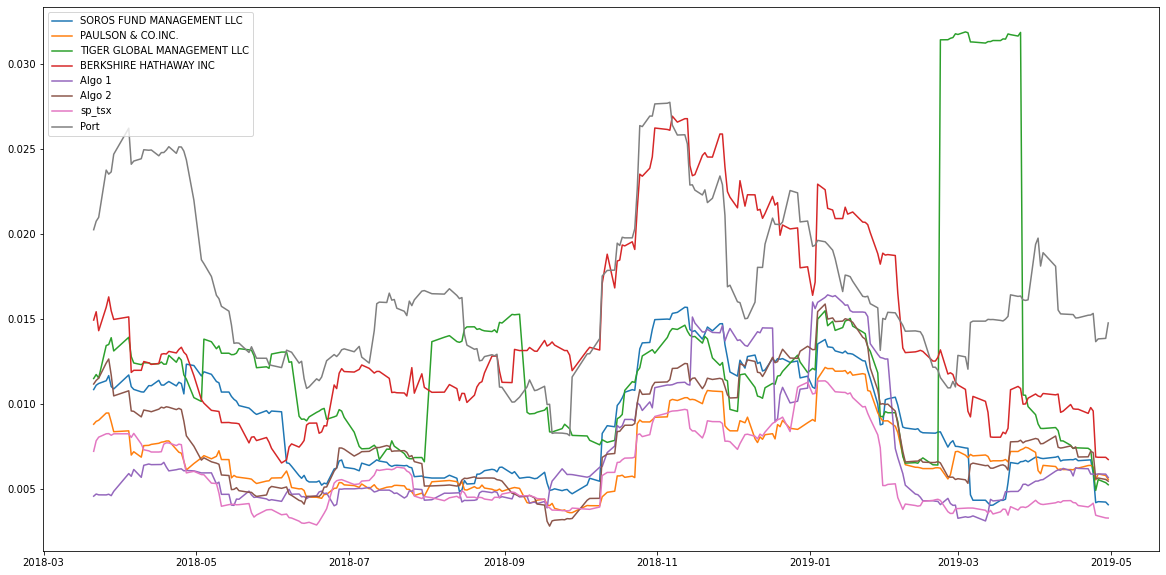

In [244]:
# Calculate rolling standard deviation

# Plot rolling standard deviation

# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std_new = df_new.rolling(21).std()
# Plot the rolling standard deviation
rolling_std_new.plot(figsize = [20,10])

### Calculate and plot the correlation

<AxesSubplot:>

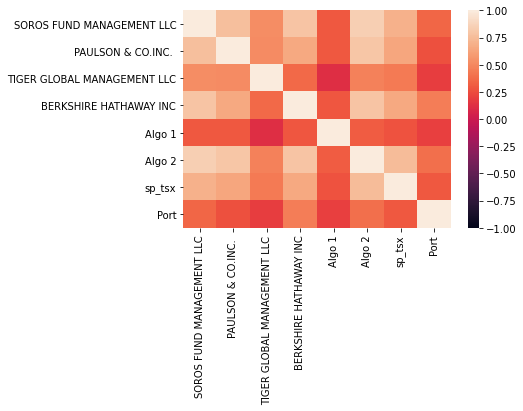

In [245]:
# Calculate and plot the correlation
corr_mat_new = df_new.corr()
# Display de correlation matrix
sns.heatmap(corr_mat_new, vmin = -1, vmax = 1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:>

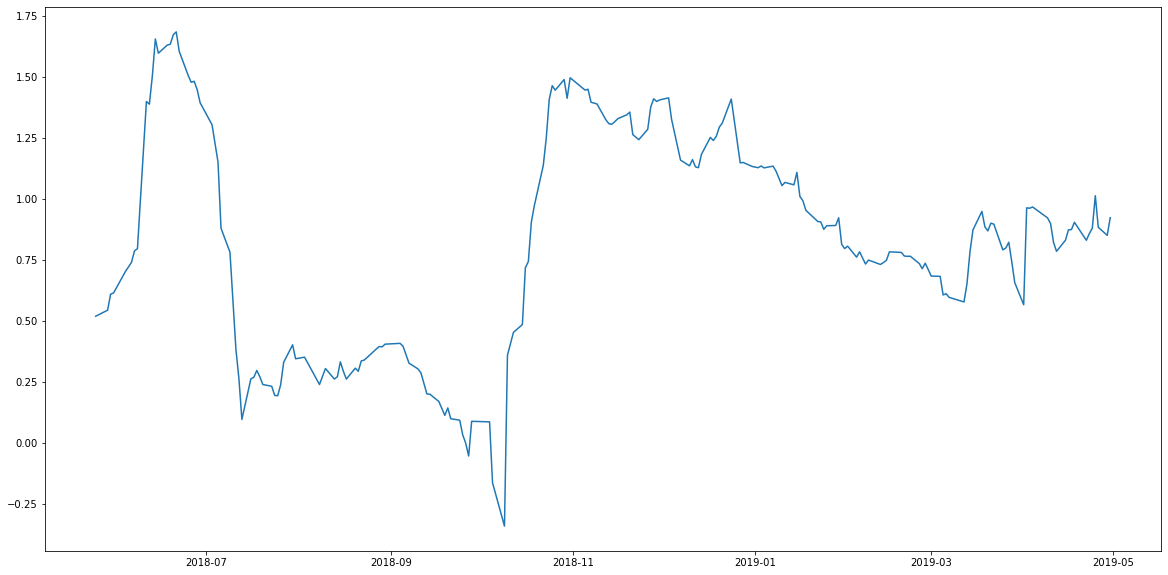

In [246]:
# Calculate and plot Beta
# Calculate covariance of a single portfolio
port_cov = df_new["Port"].cov(df["sp_tsx"])

# Calculate variance of S&P TSX
sp_var_new = df_new["sp_tsx"].var()
# Computing beta
port_beta = port_cov/sp_var_new

# Plot beta trend
rolling_cov = df_new["Port"].rolling(window=60).cov(df_new["sp_tsx"])/df_new["sp_tsx"].rolling(window=60).var()
rolling_cov.plot(figsize=(20, 10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [247]:
# Calculate Annualzied Sharpe Ratios
df_new_sharpe = df_new.mean()*252/(df_new.std()*np.sqrt(252))
df_new_sharpe

SOROS FUND MANAGEMENT LLC     -0.509574
PAULSON & CO.INC.             -0.644293
TIGER GLOBAL MANAGEMENT LLC   -1.292450
BERKSHIRE HATHAWAY INC        -0.374413
Algo 1                         1.720074
Algo 2                        -0.618098
sp_tsx                         0.060046
Port                           0.055509
dtype: float64

<AxesSubplot:>

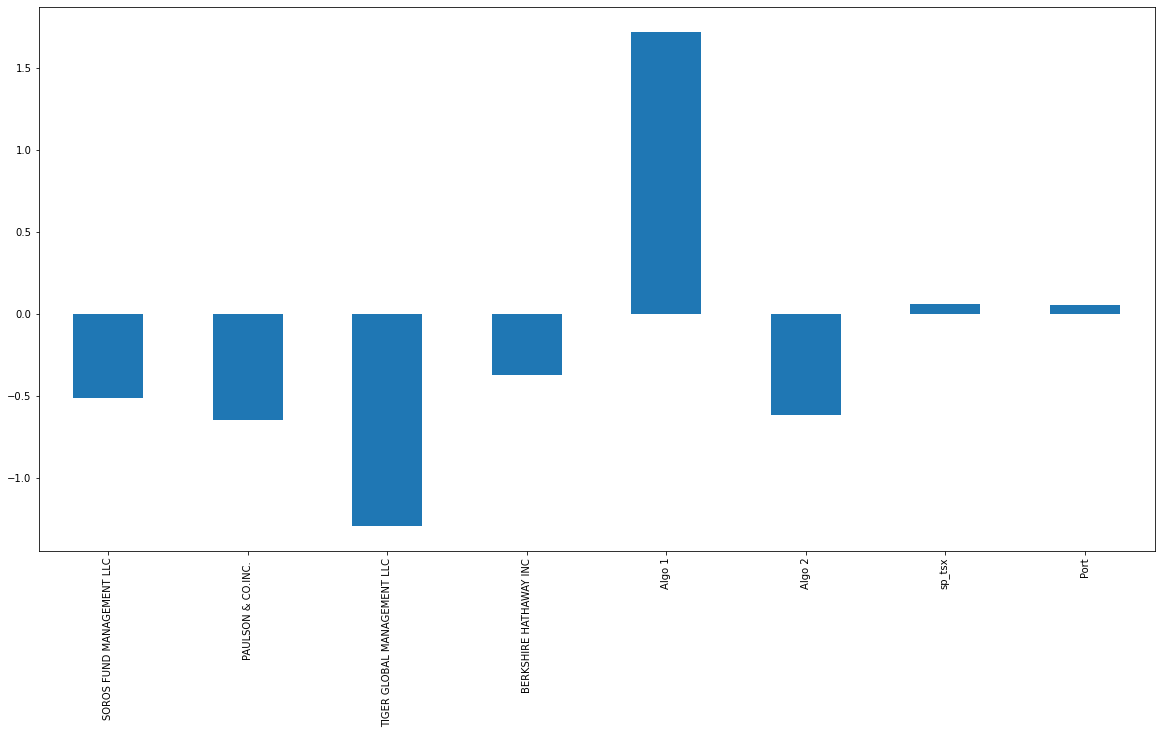

In [248]:
# Visualize the sharpe ratios as a bar plot
df_new_sharpe.plot(figsize = [20,10], kind='bar')

### How does your portfolio do?

Write your answer here!

In [ ]:
Algo 1 is still the best